In [ ]:
import numpy as np


In [ ]:
xi=[0.1,0.5,0.2]
wi=[0.4,0.3,0.6]
th=0.5


In [ ]:
def step(wsum):
    if wsum>th:
        return 1
    else:
        return 0

In [ ]:
def perceptron():
    wsum=0
    for x,w in zip(xi,wi):
        wsum+=x*w
        print(wsum)
    return step(wsum)
output=perceptron()
print("output:"+ str(output))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
train_data = pd.read_csv("mnist_train.csv").to_numpy()
test_data = pd.read_csv("mnist_test.csv").to_numpy()

In [ ]:
X_train, y_train = train_data[:, 1:] / 255.0, train_data[:, 0]  # Normalize pixels (0-1)
X_test, y_test = test_data[:, 1:] / 255.0, test_data[:, 0]

In [ ]:
def one_hot_encode(y, num_classes=10):
    one_hot = np.zeros((len(y), num_classes))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot

y_train_oh = one_hot_encode(y_train)
y_test_oh = one_hot_encode(y_test)

In [ ]:
input_size = 784 
hidden_size = 128  
output_size = 10  
learning_rate = 0.1
epochs = 50
batch_size = 32 

In [ ]:
# Initialize Weights and Biases
np.random.seed(42)
W1 = np.random.randn(hidden_size, input_size) * 0.01
b1 = np.zeros((hidden_size, 1))
W2 = np.random.randn(output_size, hidden_size) * 0.01
b2 = np.zeros((output_size, 1))

In [ ]:
# Activation Functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return z * (1 - z)

In [ ]:
# Training Process
losses = []
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(len(X_train))  # Shuffle data
    X_train_shuffled = X_train[shuffled_indices]
    y_train_shuffled = y_train_oh[shuffled_indices]

    for i in range(0, len(X_train), batch_size):
        X_batch = X_train_shuffled[i:i+batch_size].T  # (784, batch_size)
        y_batch = y_train_shuffled[i:i+batch_size].T  # (10, batch_size)

        # Forward Propagation
        Z1 = np.dot(W1, X_batch) + b1
        A1 = sigmoid(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)

        # Compute Loss (Mean Squared Error)
        loss = np.mean((A2 - y_batch) ** 2)
        losses.append(loss)

        # Backpropagation
        dZ2 = (A2 - y_batch) * sigmoid_derivative(A2)
        dW2 = np.dot(dZ2, A1.T) / batch_size
        db2 = np.mean(dZ2, axis=1, keepdims=True)

        dZ1 = np.dot(W2.T, dZ2) * sigmoid_derivative(A1)
        dW1 = np.dot(dZ1, X_batch.T) / batch_size
        db1 = np.mean(dZ1, axis=1, keepdims=True)

        # Update Weights
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1

    # Calculate Training Accuracy
    Z1_train = np.dot(W1, X_train.T) + b1
    A1_train = sigmoid(Z1_train)
    Z2_train = np.dot(W2, A1_train) + b2
    A2_train = sigmoid(Z2_train)
    predictions_train = np.argmax(A2_train, axis=0)
    accuracy_train = np.mean(predictions_train == y_train) * 100

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}, Training Accuracy: {accuracy_train:.2f}%")

In [ ]:
# Testing
Z1_test = np.dot(W1, X_test.T) + b1
A1_test = sigmoid(Z1_test)
Z2_test = np.dot(W2, A1_test) + b2
A2_test = sigmoid(Z2_test)

# Predictions
predictions_test = np.argmax(A2_test, axis=0)
accuracy_test = np.mean(predictions_test == y_test) * 100
print(f"Test Accuracy: {accuracy_test:.2f}%")

In [ ]:
# Plot Training Loss
plt.plot(range(len(losses)), losses, linestyle='-', color='blue')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train_data = pd.read_csv("mnist_train.csv").to_numpy()
test_data = pd.read_csv("mnist_test.csv").to_numpy()

X_train, y_train = train_data[:, 1:] / 255.0, train_data[:, 0]  # Normalize pixels (0-1)
X_test, y_test = test_data[:, 1:] / 255.0, test_data[:, 0]

def one_hot_encode(y, num_classes=10):
    one_hot = np.zeros((len(y), num_classes))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot

y_train_oh = one_hot_encode(y_train)
y_test_oh = one_hot_encode(y_test)

# Define Network Parameters
input_size = 784 
hidden_size = 128  
output_size = 10  
learning_rate = 0.1
epochs = 50
batch_size = 32 

# Initialize Weights and Biases
np.random.seed(42)
W1 = np.random.randn(hidden_size, input_size) * 0.01
b1 = np.zeros((hidden_size, 1))
W2 = np.random.randn(output_size, hidden_size) * 0.01
b2 = np.zeros((output_size, 1))

# Activation Functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return z * (1 - z)

# Training Process
losses = []
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(len(X_train))  # Shuffle data
    X_train_shuffled = X_train[shuffled_indices]
    y_train_shuffled = y_train_oh[shuffled_indices]

    for i in range(0, len(X_train), batch_size):
        X_batch = X_train_shuffled[i:i+batch_size].T  # (784, batch_size)
        y_batch = y_train_shuffled[i:i+batch_size].T  # (10, batch_size)

        # Forward Propagation
        Z1 = np.dot(W1, X_batch) + b1
        A1 = sigmoid(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)

        # Compute Loss (Mean Squared Error)
        loss = np.mean((A2 - y_batch) ** 2)
        losses.append(loss)

        # Backpropagation
        dZ2 = (A2 - y_batch) * sigmoid_derivative(A2)
        dW2 = np.dot(dZ2, A1.T) / batch_size
        db2 = np.mean(dZ2, axis=1, keepdims=True)

        dZ1 = np.dot(W2.T, dZ2) * sigmoid_derivative(A1)
        dW1 = np.dot(dZ1, X_batch.T) / batch_size
        db1 = np.mean(dZ1, axis=1, keepdims=True)

        # Update Weights
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1

    # Calculate Training Accuracy
    Z1_train = np.dot(W1, X_train.T) + b1
    A1_train = sigmoid(Z1_train)
    Z2_train = np.dot(W2, A1_train) + b2
    A2_train = sigmoid(Z2_train)
    predictions_train = np.argmax(A2_train, axis=0)
    accuracy_train = np.mean(predictions_train == y_train) * 100

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}, Training Accuracy: {accuracy_train:.2f}%")

# Testing
Z1_test = np.dot(W1, X_test.T) + b1
A1_test = sigmoid(Z1_test)
Z2_test = np.dot(W2, A1_test) + b2
A2_test = sigmoid(Z2_test)

# Predictions
predictions_test = np.argmax(A2_test, axis=0)
accuracy_test = np.mean(predictions_test == y_test) * 100
print(f"Test Accuracy: {accuracy_test:.2f}%")

# Plot Training Loss
plt.plot(range(len(losses)), losses, linestyle='-', color='blue')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()


In [ ]:
import numpy as np
import pandas as pd

# Load dataset
train_data = pd.read_csv("mnist_train.csv").to_numpy()
test_data = pd.read_csv("mnist_test.csv").to_numpy()

# Data Preprocessing
X_train, y_train = train_data[:, 1:] / 255.0, train_data[:, 0]  # Normalize pixels (0-1)
X_test, y_test = test_data[:, 1:] / 255.0, test_data[:, 0]

# One-Hot Encoding for labels
def one_hot_encode(y, num_classes=10):
    one_hot = np.zeros((len(y), num_classes))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot

y_train_oh = one_hot_encode(y_train)
y_test_oh = one_hot_encode(y_test)

# Define Network Parameters
input_size = 784  # 28x28 pixels
hidden_size = 64  # Number of neurons in the hidden layer
output_size = 10  # Digits 0-9
learning_rate = 0.1
epochs = 10

# Initialize Weights and Biases
np.random.seed(42)
W1 = np.random.randn(hidden_size, input_size) * 0.01
b1 = np.zeros((hidden_size, 1))
W2 = np.random.randn(output_size, hidden_size) * 0.01
b2 = np.zeros((output_size, 1))

# Activation Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Derivative of Sigmoid
def sigmoid_derivative(z):
    return z * (1 - z)

# Training Process
for epoch in range(epochs):
    correct = 0
    for i in range(len(X_train)):
        x = X_train[i].reshape(-1, 1)  # Input (784x1)
        y_true = y_train_oh[i].reshape(-1, 1)  # True label (10x1)

        # Forward Propagation
        z1 = np.dot(W1, x) + b1
        a1 = sigmoid(z1)
        z2 = np.dot(W2, a1) + b2
        a2 = sigmoid(z2)

        # Backpropagation
        error = a2 - y_true  # Output error
        dW2 = np.dot(error * sigmoid_derivative(a2), a1.T)
        db2 = error * sigmoid_derivative(a2)

        hidden_error = np.dot(W2.T, error)
        dW1 = np.dot(hidden_error * sigmoid_derivative(a1), x.T)
        db1 = hidden_error * sigmoid_derivative(a1)

        # Update Weights
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1

        # Accuracy Calculation
        if np.argmax(a2) == np.argmax(y_true):
            correct += 1

    accuracy = 100 * correct / len(X_train)
    print(f"Epoch {epoch+1}/{epochs}, Training Accuracy: {accuracy:.2f}%")

# Testing
correct = 0
for i in range(len(X_test)):
    x = X_test[i].reshape(-1, 1)
    y_true = y_test[i]

    # Forward pass
    z1 = np.dot(W1, x) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = sigmoid(z2)

    if np.argmax(a2) == y_true:
        correct += 1

accuracy = 100 * correct / len(X_test)
print(f"Test Accuracy: {accuracy:.2f}%")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
train_data = pd.read_csv("/mnt/data/mnist_train.csv").to_numpy()
test_data = pd.read_csv("/mnt/data/mnist_test.csv").to_numpy()

# Take first 6000 samples for training and first 1000 samples for testing
train_data = train_data[:6000]
test_data = test_data[:1000]

# Data Preprocessing
X_train, y_train = train_data[:, 1:] / 255.0, train_data[:, 0]  # Normalize pixel values
X_test, y_test = test_data[:, 1:] / 255.0, test_data[:, 0]

# One-Hot Encoding for labels
def one_hot_encode(y, num_classes=10):
    one_hot = np.zeros((len(y), num_classes))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot

y_train_oh = one_hot_encode(y_train)
y_test_oh = one_hot_encode(y_test)

# Define Network Parameters
input_size = 784  # 28x28 pixels
hidden_size = 64  # Hidden layer neurons
output_size = 10  # Digits 0-9
learning_rate = 0.1
epochs = 50
batch_size = 100  # Training in batches

# Initialize Weights and Biases
np.random.seed(42)
W1 = np.random.randn(hidden_size, input_size) * 0.01
b1 = np.zeros((hidden_size, 1))
W2 = np.random.randn(output_size, hidden_size) * 0.01
b2 = np.zeros((output_size, 1))

# Activation Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Derivative of Sigmoid
def sigmoid_derivative(z):
    return z * (1 - z)

# Lists for plotting
epoch_losses = []
epoch_accuracies = []

# Training Process
for epoch in range(epochs):
    correct = 0
    total_loss = 0

    # Shuffle dataset before each epoch
    indices = np.arange(len(X_train))
    np.random.shuffle(indices)
    X_train, y_train_oh = X_train[indices], y_train_oh[indices]

    # Process in batches
    for batch_start in range(0, len(X_train), batch_size):
        batch_X = X_train[batch_start:batch_start + batch_size]
        batch_Y = y_train_oh[batch_start:batch_start + batch_size]

        dW1 = np.zeros_like(W1)
        db1 = np.zeros_like(b1)
        dW2 = np.zeros_like(W2)
        db2 = np.zeros_like(b2)
        batch_loss = 0

        for i in range(len(batch_X)):
            x = batch_X[i].reshape(-1, 1)
            y_true = batch_Y[i].reshape(-1, 1)

            # Forward Propagation
            z1 = np.dot(W1, x) + b1
            a1 = sigmoid(z1)
            z2 = np.dot(W2, a1) + b2
            a2 = sigmoid(z2)

            # Compute loss
            error = a2 - y_true  # Output error
            batch_loss += np.mean(error ** 2)

            # Backpropagation
            dW2 += np.dot(error * sigmoid_derivative(a2), a1.T)
            db2 += error * sigmoid_derivative(a2)

            hidden_error = np.dot(W2.T, error)
            dW1 += np.dot(hidden_error * sigmoid_derivative(a1), x.T)
            db1 += hidden_error * sigmoid_derivative(a1)

            # Accuracy Calculation
            if np.argmax(a2) == np.argmax(y_true):
                correct += 1

        # Update Weights (batch-wise)
        W2 -= learning_rate * (dW2 / batch_size)
        b2 -= learning_rate * (db2 / batch_size)
        W1 -= learning_rate * (dW1 / batch_size)
        b1 -= learning_rate * (db1 / batch_size)

        total_loss += batch_loss / batch_size

        # Print batch progress
        print(f"Epoch: {epoch+1}/{epochs} | Batch {batch_start//batch_size+1}/{len(X_train)//batch_size} | Cost: {batch_loss / batch_size:.4f}")

    # Compute and print overall training loss (MSE)
    train_mse = total_loss / (len(X_train) / batch_size)
    accuracy = 100 * correct / len(X_train)
    epoch_losses.append(train_mse)
    epoch_accuracies.append(accuracy)

    print(f"Train MSE: {train_mse:.4f} | Training Accuracy: {accuracy:.2f}%")

# Testing
correct = 0
for i in range(len(X_test)):
    x = X_test[i].reshape(-1, 1)
    y_true = y_test[i]

    # Forward pass
    z1 = np.dot(W1, x) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = sigmoid(z2)

    if np.argmax(a2) == y_true:
        correct += 1

test_accuracy = 100 * correct / len(X_test)
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Plot Training Loss and Accuracy
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), epoch_losses, marker='o', linestyle='-', color='b', label='MSE Loss')
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Training Loss Curve")
plt.legend()
plt.grid()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), epoch_accuracies, marker='o', linestyle='-', color='g', label="Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Training Accuracy Curve")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train_data = pd.read_csv("mnist_train.csv").to_numpy()
test_data = pd.read_csv("mnist_test.csv").to_numpy()

train_data = train_data[:6000]
test_data = test_data[:1000]


X_train, y_train = train_data[:, 1:] / 255.0, train_data[:, 0]
X_test, y_test = test_data[:, 1:] / 255.0, test_data[:, 0]


def one_hot_encode(y, num_classes=10):
    one_hot = np.zeros((len(y), num_classes))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot

y_train_oh = one_hot_encode(y_train)
y_test_oh = one_hot_encode(y_test)


input_size = 28*28  
hidden_size =50  
output_size = 10
learning_rate = 0.1
epochs = 50
batch_size = 100 

np.random.seed(42)
W1 = np.random.randn(hidden_size, input_size) * 0.01
b1 = np.zeros((hidden_size, 1))
W2 = np.random.randn(output_size, hidden_size) * 0.01
b2 = np.zeros((output_size, 1))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return z * (1 - z)

epoch_losses = []
epoch_accuracies = []
for epoch in range(epochs):
    correct = 0
    total_loss = 0
    indices = np.arange(len(X_train))
    np.random.shuffle(indices)
    X_train, y_train_oh = X_train[indices], y_train_oh[indices]

    
    for batch_start in range(0, len(X_train), batch_size):
        batch_X = X_train[batch_start:batch_start + batch_size]
        batch_Y = y_train_oh[batch_start:batch_start + batch_size]

        dW1 = np.zeros_like(W1)
        db1 = np.zeros_like(b1)
        dW2 = np.zeros_like(W2)
        db2 = np.zeros_like(b2)
        batch_loss = 0

        for i in range(len(batch_X)):
            x = batch_X[i].reshape(-1, 1)
            y_true = batch_Y[i].reshape(-1, 1)

            
            z1 = np.dot(W1, x) + b1
            a1 = sigmoid(z1)
            z2 = np.dot(W2, a1) + b2
            a2 = sigmoid(z2)

            
            error = a2 - y_true  
            batch_loss += np.mean(error ** 2)

            
            dW2 += np.dot(error * sigmoid_derivative(a2), a1.T)
            db2 += error * sigmoid_derivative(a2)

            hidden_error = np.dot(W2.T, error)
            dW1 += np.dot(hidden_error * sigmoid_derivative(a1), x.T)
            db1 += hidden_error * sigmoid_derivative(a1)

            
            if np.argmax(a2) == np.argmax(y_true):
                correct += 1

        
        W2 -= learning_rate * (dW2 / batch_size)
        b2 -= learning_rate * (db2 / batch_size)
        W1 -= learning_rate * (dW1 / batch_size)
        b1 -= learning_rate * (db1 / batch_size)

        total_loss += batch_loss / batch_size

        
        print(f"Epoch: {epoch+1}/{epochs} | Batch {batch_start//batch_size+1}/{len(X_train)//batch_size} | Cost: {batch_loss / batch_size:.4f}")

    
    train_mse = total_loss / (len(X_train) / batch_size)
    accuracy = 100 * correct / len(X_train)
    epoch_losses.append(train_mse)
    epoch_accuracies.append(accuracy)

    print(f"Train MSE: {train_mse:.4f} | Training Accuracy: {accuracy:.2f}%")


correct = 0
for i in range(len(X_test)):
    x = X_test[i].reshape(-1, 1)
    y_true = y_test[i]

    # Forward pass
    z1 = np.dot(W1, x) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = sigmoid(z2)

    if np.argmax(a2) == y_true:
        correct += 1

test_accuracy = 100 * correct / len(X_test)
print(f"Test Accuracy: {test_accuracy:.2f}%")



Epoch: 1/50 | Batch 1/60 | Cost: 0.2510
Epoch: 1/50 | Batch 2/60 | Cost: 0.2256
Epoch: 1/50 | Batch 3/60 | Cost: 0.2035
Epoch: 1/50 | Batch 4/60 | Cost: 0.1850
Epoch: 1/50 | Batch 5/60 | Cost: 0.1692
Epoch: 1/50 | Batch 6/60 | Cost: 0.1559
Epoch: 1/50 | Batch 7/60 | Cost: 0.1446
Epoch: 1/50 | Batch 8/60 | Cost: 0.1351
Epoch: 1/50 | Batch 9/60 | Cost: 0.1271
Epoch: 1/50 | Batch 10/60 | Cost: 0.1204
Epoch: 1/50 | Batch 11/60 | Cost: 0.1152
Epoch: 1/50 | Batch 12/60 | Cost: 0.1113
Epoch: 1/50 | Batch 13/60 | Cost: 0.1080
Epoch: 1/50 | Batch 14/60 | Cost: 0.1050
Epoch: 1/50 | Batch 15/60 | Cost: 0.1016
Epoch: 1/50 | Batch 16/60 | Cost: 0.1007
Epoch: 1/50 | Batch 17/60 | Cost: 0.0993
Epoch: 1/50 | Batch 18/60 | Cost: 0.0979
Epoch: 1/50 | Batch 19/60 | Cost: 0.0964
Epoch: 1/50 | Batch 20/60 | Cost: 0.0958
Epoch: 1/50 | Batch 21/60 | Cost: 0.0947
Epoch: 1/50 | Batch 22/60 | Cost: 0.0945
Epoch: 1/50 | Batch 23/60 | Cost: 0.0933
Epoch: 1/50 | Batch 24/60 | Cost: 0.0936
Epoch: 1/50 | Batch 25/60

Text(0.5, 1.0, 'Training Loss Curve')

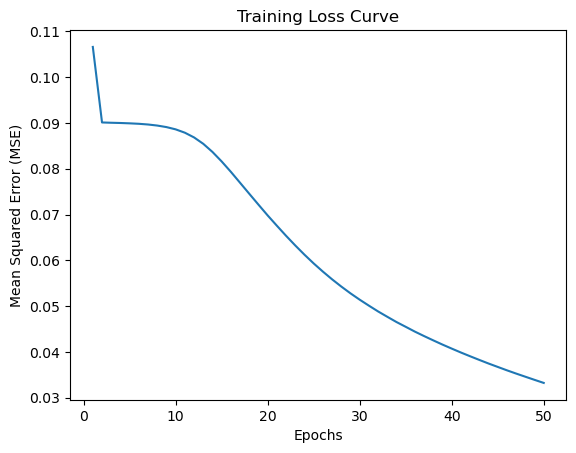

In [2]:

plt.plot(range(1, epochs+1), epoch_losses)
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Training Loss Curve")



Text(0.5, 1.0, 'Training Accuracy Curve')

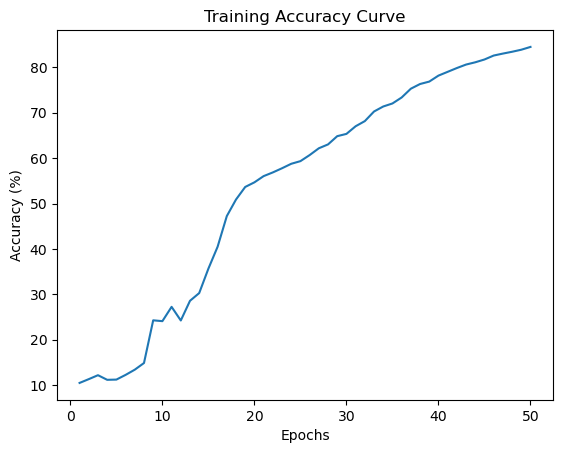

In [3]:

plt.plot(range(1, epochs+1), epoch_accuracies)
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Training Accuracy Curve")


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train_data = pd.read_csv("mnist_train.csv").to_numpy()
test_data = pd.read_csv("mnist_test.csv").to_numpy()

X_train, y_train = train_data[:, 1:] / 255.0, train_data[:, 0]  # Normalize pixels (0-1)
X_test, y_test = test_data[:, 1:] / 255.0, test_data[:, 0]

def one_hot_encode(y, num_classes=10):
    one_hot = np.zeros((len(y), num_classes))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot

y_train_oh = one_hot_encode(y_train)
y_test_oh = one_hot_encode(y_test)


input_size = 784 
hidden_size = 128  
output_size = 10  
learning_rate = 0.1
epochs = 50
batch_size = 32 


np.random.seed(42)
W1 = np.random.randn(hidden_size, input_size) * 0.01
b1 = np.zeros((hidden_size, 1))
W2 = np.random.randn(output_size, hidden_size) * 0.01
b2 = np.zeros((output_size, 1))


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return z * (1 - z)


losses = []
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(len(X_train))
    X_train_shuffled = X_train[shuffled_indices]
    y_train_shuffled = y_train_oh[shuffled_indices]

    for i in range(0, len(X_train), batch_size):
        X_batch = X_train_shuffled[i:i+batch_size].T  
        y_batch = y_train_shuffled[i:i+batch_size].T

        
        Z1 = np.dot(W1, X_batch) + b1
        A1 = sigmoid(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)

        
        loss = np.mean((A2 - y_batch) ** 2)
        losses.append(loss)

       
        dZ2 = (A2 - y_batch) * sigmoid_derivative(A2)
        dW2 = np.dot(dZ2, A1.T) / batch_size
        db2 = np.mean(dZ2, axis=1, keepdims=True)

        dZ1 = np.dot(W2.T, dZ2) * sigmoid_derivative(A1)
        dW1 = np.dot(dZ1, X_batch.T) / batch_size
        db1 = np.mean(dZ1, axis=1, keepdims=True)

        
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1

    
    Z1_train = np.dot(W1, X_train.T) + b1
    A1_train = sigmoid(Z1_train)
    Z2_train = np.dot(W2, A1_train) + b2
    A2_train = sigmoid(Z2_train)
    predictions_train = np.argmax(A2_train, axis=0)
    accuracy_train = np.mean(predictions_train == y_train) * 100

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}, Training Accuracy: {accuracy_train:.2f}%")

Z1_test = np.dot(W1, X_test.T) + b1
A1_test = sigmoid(Z1_test)
Z2_test = np.dot(W2, A1_test) + b2
A2_test = sigmoid(Z2_test)

predictions_test = np.argmax(A2_test, axis=0)
accuracy_test = np.mean(predictions_test == y_test) * 100
print(f"Test Accuracy: {accuracy_test:.2f}%")



Epoch 1/50, Loss: 0.0772, Training Accuracy: 31.47%
Epoch 2/50, Loss: 0.0465, Training Accuracy: 73.10%
Epoch 3/50, Loss: 0.0257, Training Accuracy: 83.99%
Epoch 4/50, Loss: 0.0233, Training Accuracy: 87.66%
Epoch 5/50, Loss: 0.0203, Training Accuracy: 88.88%
Epoch 6/50, Loss: 0.0194, Training Accuracy: 89.66%
Epoch 7/50, Loss: 0.0234, Training Accuracy: 90.24%
Epoch 8/50, Loss: 0.0086, Training Accuracy: 90.66%
Epoch 9/50, Loss: 0.0147, Training Accuracy: 90.94%
Epoch 10/50, Loss: 0.0240, Training Accuracy: 91.17%
Epoch 11/50, Loss: 0.0113, Training Accuracy: 91.50%
Epoch 12/50, Loss: 0.0286, Training Accuracy: 91.70%
Epoch 13/50, Loss: 0.0330, Training Accuracy: 91.97%
Epoch 14/50, Loss: 0.0227, Training Accuracy: 92.12%
Epoch 15/50, Loss: 0.0123, Training Accuracy: 92.34%
Epoch 16/50, Loss: 0.0173, Training Accuracy: 92.50%
Epoch 17/50, Loss: 0.0123, Training Accuracy: 92.68%
Epoch 18/50, Loss: 0.0131, Training Accuracy: 92.89%
Epoch 19/50, Loss: 0.0135, Training Accuracy: 93.03%
Ep

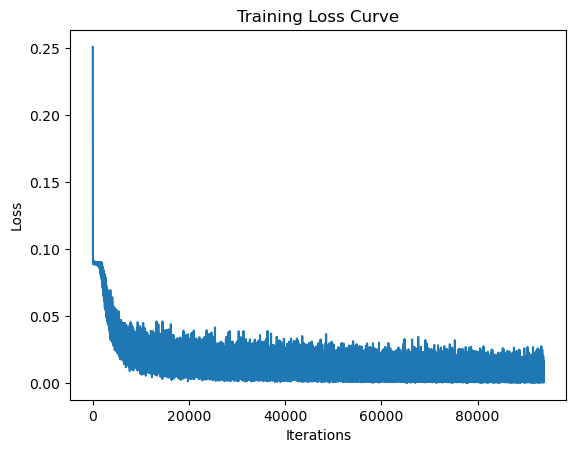

In [5]:
# Plot Training Loss
plt.plot(range(len(losses)), losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()


Text(0.5, 1.0, 'Training Loss Curve')

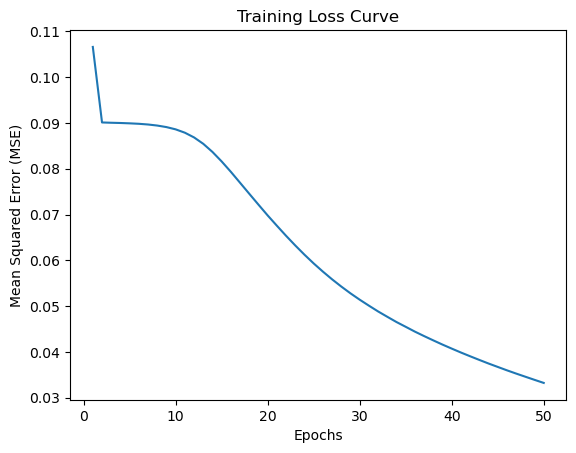

In [6]:
plt.plot(range(1, epochs+1), epoch_losses)
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Training Loss Curve")

Text(0.5, 1.0, 'Training Accuracy Curve')

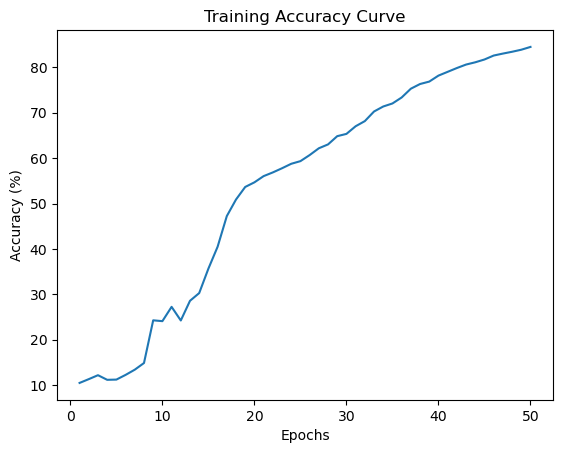

In [7]:
plt.plot(range(1, epochs+1), epoch_accuracies)
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Training Accuracy Curve")


In [8]:
import numpy as np
import pandas as pd

# Load dataset
train_data = pd.read_csv("mnist_train.csv").to_numpy()
test_data = pd.read_csv("mnist_test.csv").to_numpy()

# Data Preprocessing
X_train, y_train = train_data[:, 1:] / 255.0, train_data[:, 0]  # Normalize pixels (0-1)
X_test, y_test = test_data[:, 1:] / 255.0, test_data[:, 0]

# One-Hot Encoding for labels
def one_hot_encode(y, num_classes=10):
    one_hot = np.zeros((len(y), num_classes))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot

y_train_oh = one_hot_encode(y_train)
y_test_oh = one_hot_encode(y_test)

# Define Network Parameters
input_size = 784  # 28x28 pixels
hidden_size = 64  # Number of neurons in the hidden layer
output_size = 10  # Digits 0-9
learning_rate = 0.1
epochs = 10

# Initialize Weights and Biases
np.random.seed(42)
W1 = np.random.randn(hidden_size, input_size) * 0.01
b1 = np.zeros((hidden_size, 1))
W2 = np.random.randn(output_size, hidden_size) * 0.01
b2 = np.zeros((output_size, 1))


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return z * (1 - z)

# Training Process
for epoch in range(epochs):
    correct = 0
    for i in range(len(X_train)):
        x = X_train[i].reshape(-1, 1)  # Input (784x1)
        y_true = y_train_oh[i].reshape(-1, 1)  # True label (10x1)

        # Forward Propagation
        z1 = np.dot(W1, x) + b1
        a1 = sigmoid(z1)
        z2 = np.dot(W2, a1) + b2
        a2 = sigmoid(z2)

        # Backpropagation
        error = a2 - y_true  # Output error
        dW2 = np.dot(error * sigmoid_derivative(a2), a1.T)
        db2 = error * sigmoid_derivative(a2)

        hidden_error = np.dot(W2.T, error)
        dW1 = np.dot(hidden_error * sigmoid_derivative(a1), x.T)
        db1 = hidden_error * sigmoid_derivative(a1)

        # Update Weights
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1

        # Accuracy Calculation
        if np.argmax(a2) == np.argmax(y_true):
            correct += 1

    accuracy = 100 * correct / len(X_train)
    print(f"Epoch {epoch+1}/{epochs}, Training Accuracy: {accuracy:.2f}%")

# Testing
correct = 0
for i in range(len(X_test)):
    x = X_test[i].reshape(-1, 1)
    y_true = y_test[i]

    # Forward pass
    z1 = np.dot(W1, x) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = sigmoid(z2)

    if np.argmax(a2) == y_true:
        correct += 1

accuracy = 100 * correct / len(X_test)
print(f"Test Accuracy: {accuracy:.2f}%")


Epoch 1/10, Training Accuracy: 90.69%
Epoch 2/10, Training Accuracy: 95.53%
Epoch 3/10, Training Accuracy: 96.51%
Epoch 4/10, Training Accuracy: 97.05%
Epoch 5/10, Training Accuracy: 97.47%
Epoch 6/10, Training Accuracy: 97.78%
Epoch 7/10, Training Accuracy: 98.05%
Epoch 8/10, Training Accuracy: 98.22%
Epoch 9/10, Training Accuracy: 98.37%
Epoch 10/10, Training Accuracy: 98.52%
Test Accuracy: 96.65%


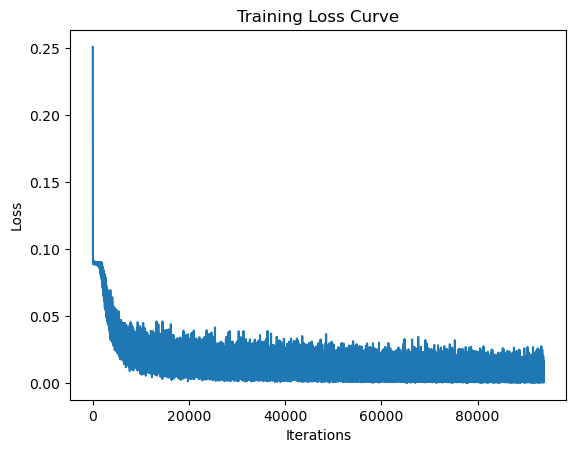

In [9]:
# Plot Training Loss
plt.plot(range(len(losses)), losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()
